#### Librerías

In [3]:
# Pre-procesamiento y visualización
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.cm as cm

# Normalizar
from sklearn.preprocessing import MinMaxScaler

# Convertir la variable objetivo a numerica
from sklearn.preprocessing import LabelEncoder

# Modelos
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA

# Evaluar el modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

#### Carga base de datos k-means2.csv y análisis descriptivo de la base de datos. 

In [ ]:
dfkm2 = pd.read_csv('data-clustering-models.csv')
dfkm2 = pd.DataFrame(dfkm2)
dfkm2.head(10)

,Unnamed: 0,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,0,0.02700,0.000000,3,0.270000,0.0190,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,1,0.21400,0.000000,18,0.346667,0.1260,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,2,0.27050,0.000000,1,0.223333,0.2320,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,3,0.34250,0.000000,13,0.396667,-0.0170,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,4,0.01075,0.097155,1,0.313830,-0.0020,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264
5,5,0.09250,0.000000,1,0.286667,0.0525,0.000004,20.114943,17.674943,0.002604,0.0285,0.423333,0.008461,3.101105
6,6,0.07325,0.000035,13,0.270270,0.0530,-0.000171,0.935620,13.223068,0.002724,0.0220,0.405405,0.008623,147.996247
7,7,0.22200,0.039383,1,0.297872,-0.0335,-0.000061,4.828199,15.904539,0.007964,0.0900,0.276596,0.016653,0.558561
8,8,0.06300,0.052098,3,0.310680,0.0175,-0.000054,0.088183,12.543311,0.002687,0.0220,0.281553,0.005982,47.769788
9,9,0.02000,0.012595,4,0.283333,0.0040,-0.000014,0.409165,12.904140,0.000805,0.0065,0.503333,0.003294,1394.064620


#### Visualización y preprocesamiento de las variables disponibles dentro de ella.

In [193]:
# Identificar tipo de datos
dfkm2.dtypes

Unnamed: 0            int64
Amplitude           float64
AndersonDarling     float64
Autocor_length        int64
Beyond1Std          float64
Gskew               float64
LinearTrend         float64
MaxSlope            float64
Mean                float64
Meanvariance        float64
MedianAbsDev        float64
MedianBRP           float64
PercentAmplitude    float64
PeriodLS            float64
dtype: object

In [195]:
# Ver si hay valores pérdidos
for row in dfkm2.columns:
    print(row, dfkm2[row].isnull().sum())

Unnamed: 0 0
Amplitude 0
AndersonDarling 0
Autocor_length 0
Beyond1Std 0
Gskew 0
LinearTrend 0
MaxSlope 0
Mean 0
Meanvariance 0
MedianAbsDev 0
MedianBRP 0
PercentAmplitude 0
PeriodLS 0


In [197]:
# Eliminar columna de indice
del dfkm2['Unnamed: 0']

In [199]:
# Verificar si está eliminada
dfkm2.dtypes

Amplitude           float64
AndersonDarling     float64
Autocor_length        int64
Beyond1Std          float64
Gskew               float64
LinearTrend         float64
MaxSlope            float64
Mean                float64
Meanvariance        float64
MedianAbsDev        float64
MedianBRP           float64
PercentAmplitude    float64
PeriodLS            float64
dtype: object

In [201]:
np.round(dfkm2.describe(),2)

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,0.11,0.13,4.55,0.32,0.02,0.00,2.18,14.99,0.00,0.04,0.41,0.01,302.83
std,0.15,0.20,6.12,0.06,0.13,0.00,9.42,1.89,0.01,0.06,0.12,0.01,944.67
min,0.01,0.00,1.00,0.07,-1.76,-0.02,0.01,11.67,0.00,0.00,0.07,0.00,0.01
25%,0.02,0.00,1.00,0.29,-0.00,-0.00,0.10,13.61,0.00,0.01,0.34,0.00,0.99
50%,0.04,0.02,2.00,0.32,0.00,-0.00,0.34,14.51,0.00,0.01,0.41,0.00,18.14
75%,0.14,0.19,5.00,0.35,0.02,0.00,1.04,15.59,0.01,0.05,0.48,0.01,189.76
max,1.70,0.98,70.00,0.54,1.48,0.03,335.15,21.10,0.08,1.02,0.92,0.17,12870.88


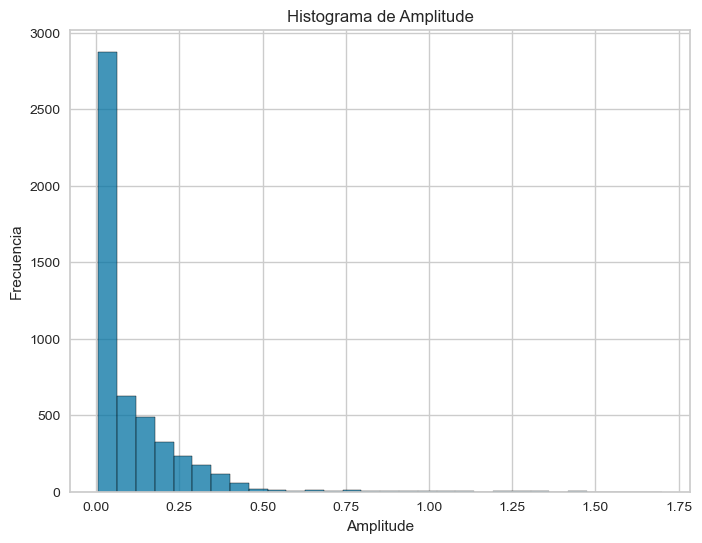

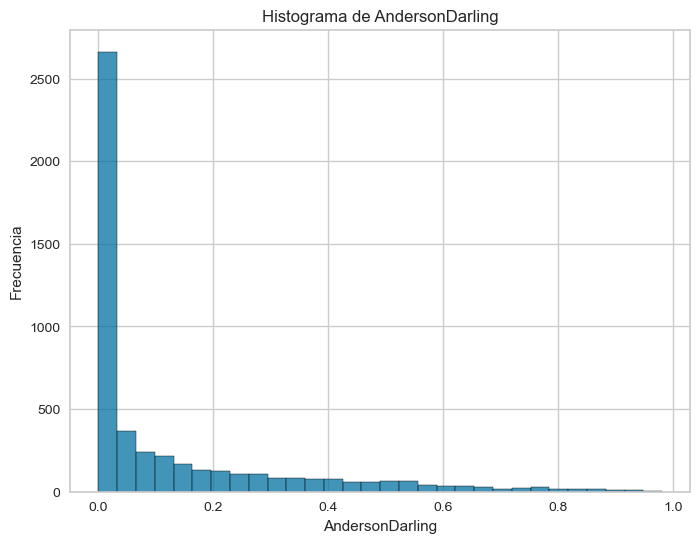

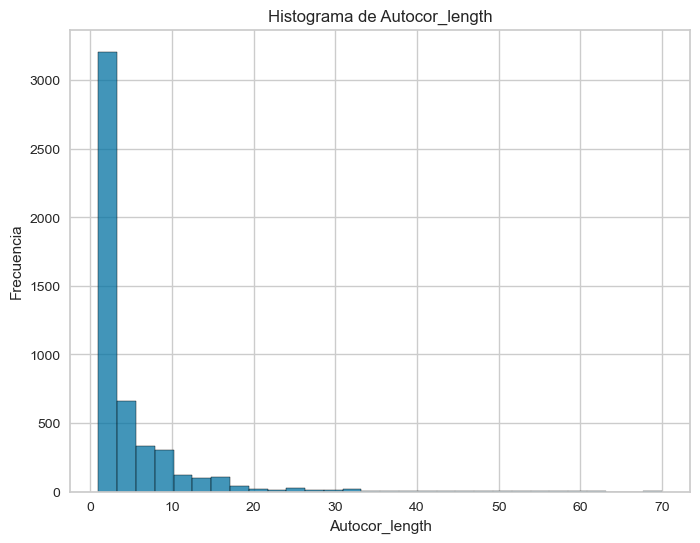

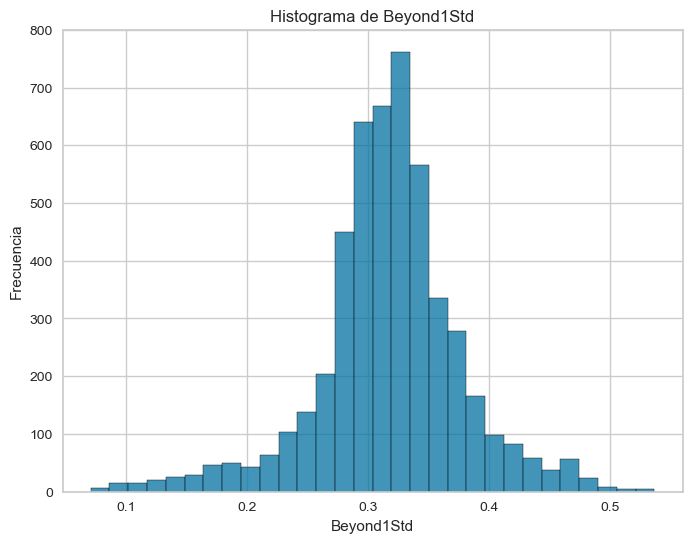

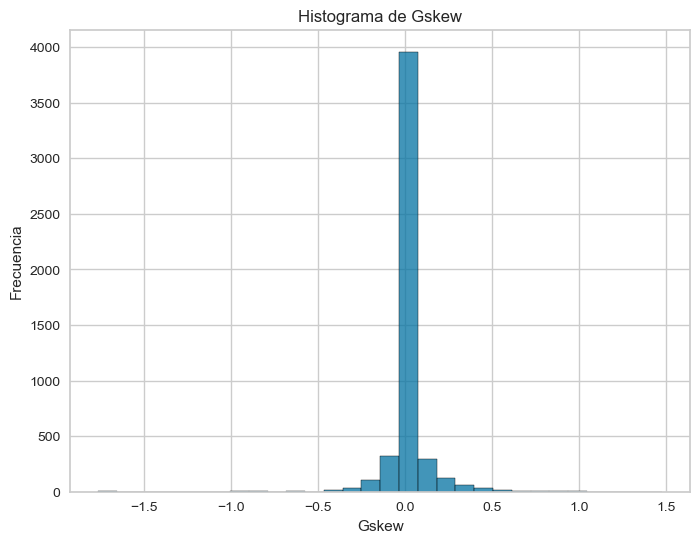

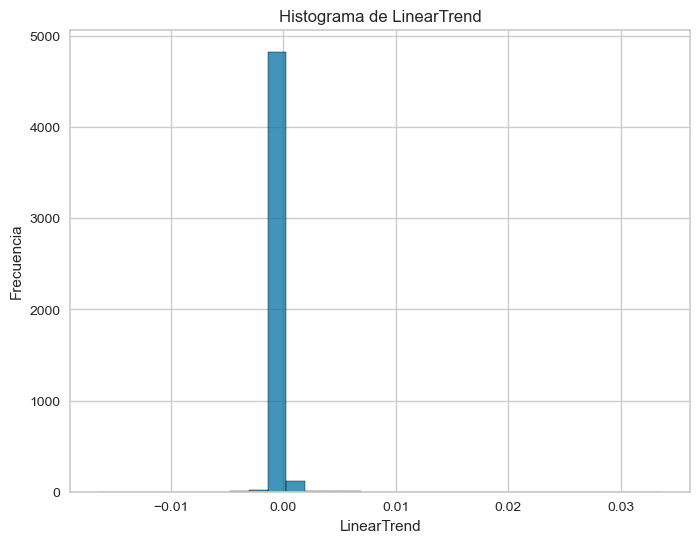

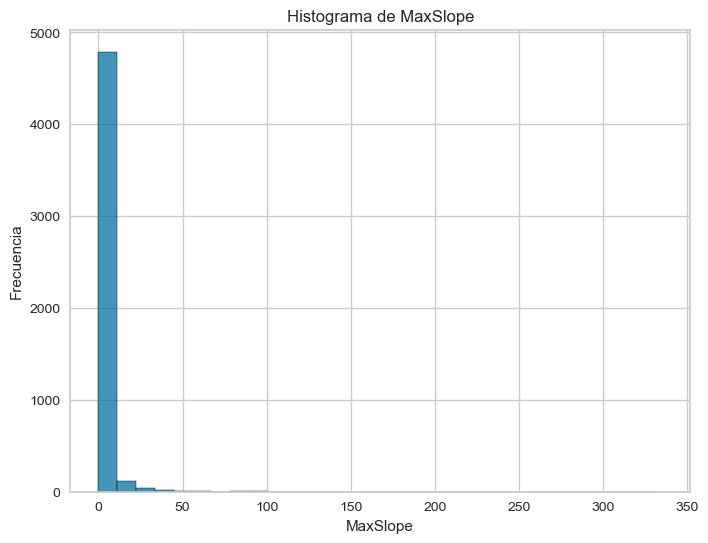

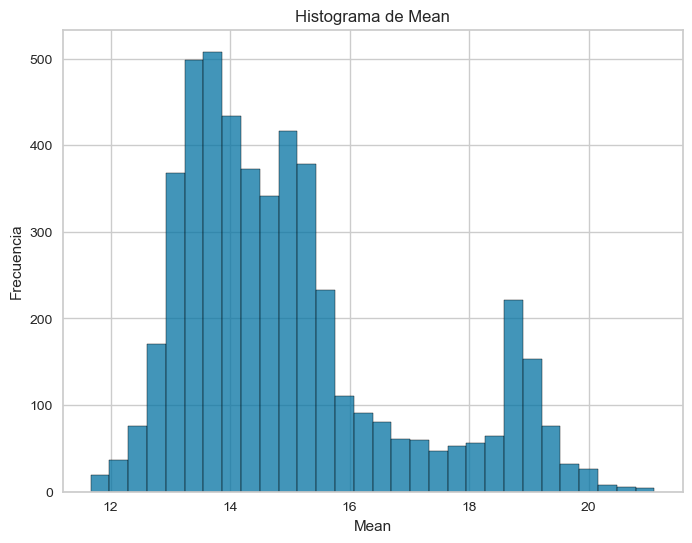

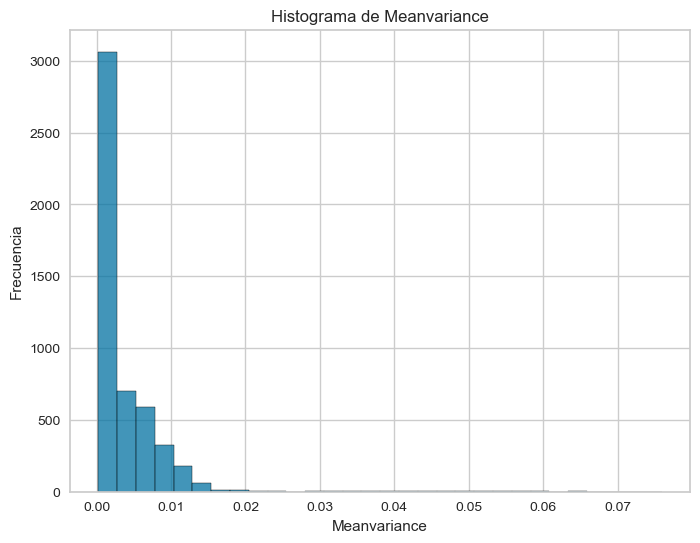

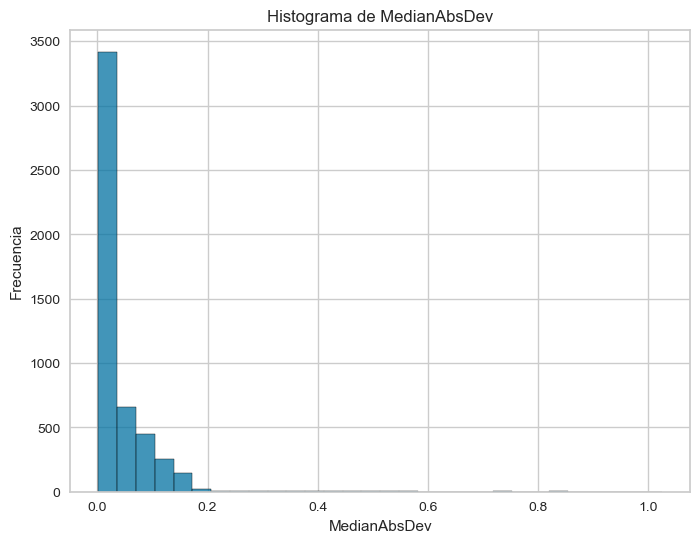

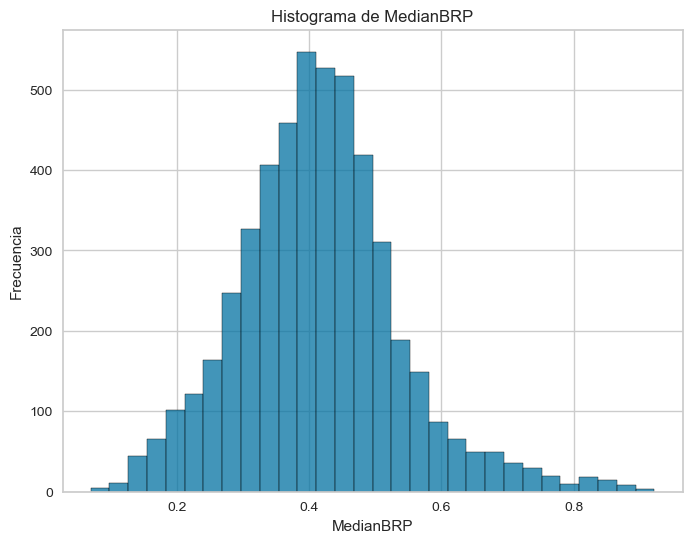

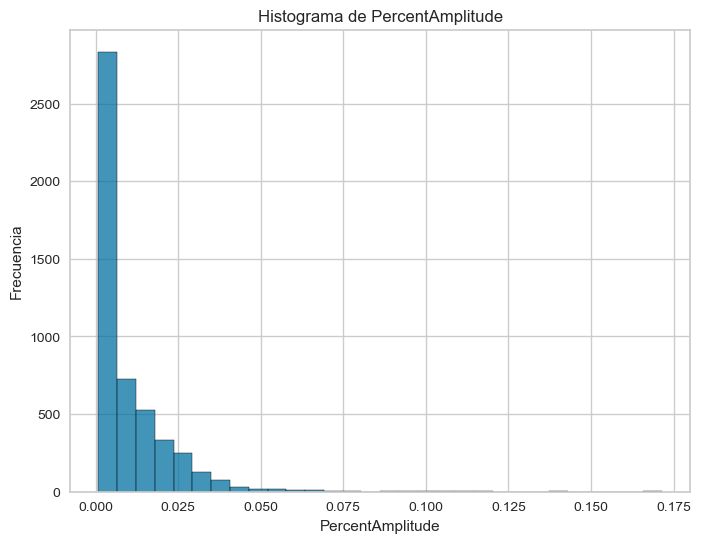

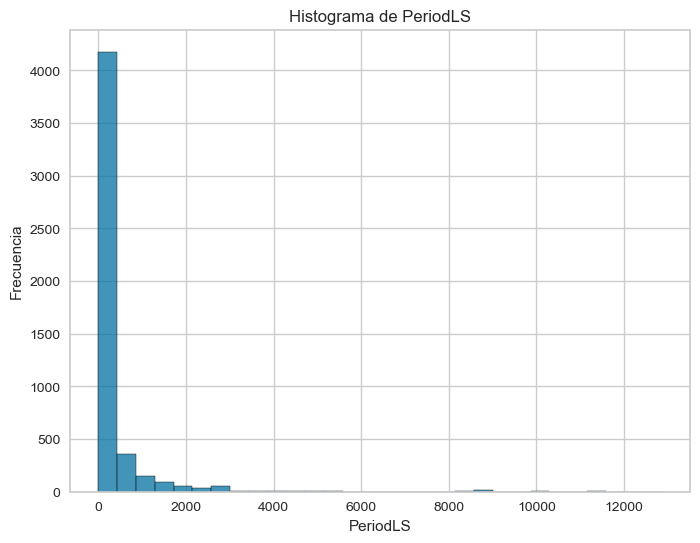

In [203]:
# Seleccionar solo las columnas numéricas para normalizarlas
numeric_cols = dfkm2.select_dtypes(include=['float64', 'int64']).columns

# Crear histograma para cada variable
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=dfkm2, x=col, bins=30)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

Las variasbles Amplitude, AndersonDarling y MedianAbsDev tienen valores muy pequeños, sobre todo en comparación con variables como Mean y PeriodLs. También se observa que las variables MaxSlope y PeriodLS tienen valores máximos mucho más grandes que sus medias, por lo tanto, se pueden cosiderar valores atípicos. Ante la disparidad de los valores, las variables deberían ser normalizadas, para eliminar los sesgos antes mencionados.

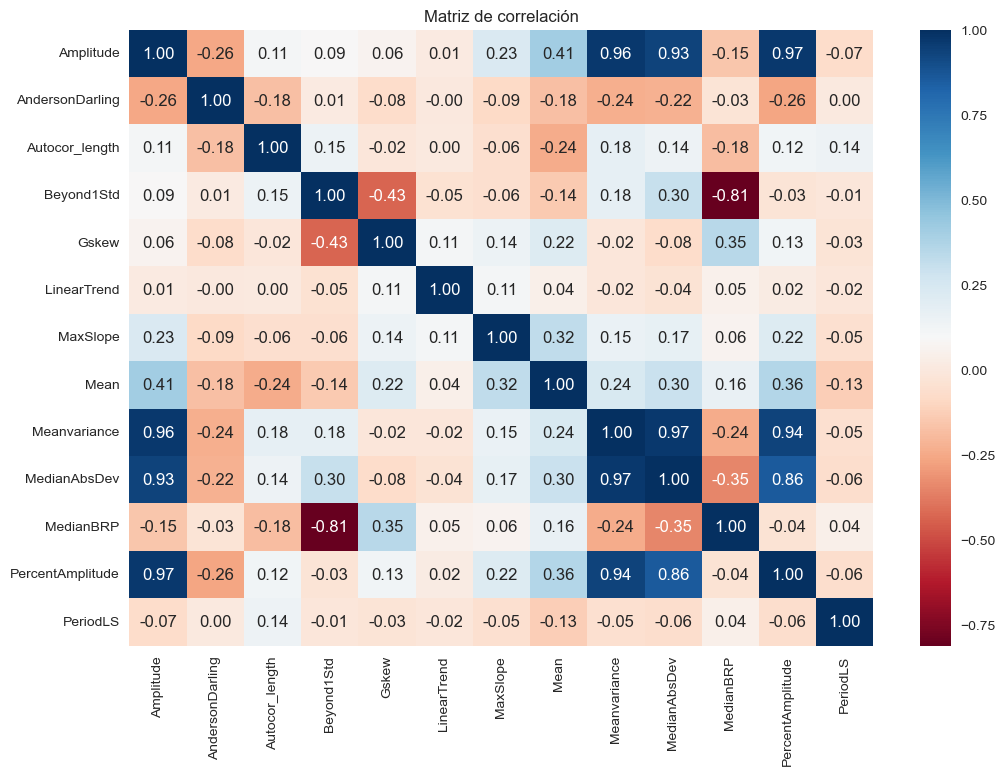

In [205]:
# Crear la matriz de correlación
correlation_matrix = dfkm2.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear Matriz
sns.heatmap(
    correlation_matrix, 
    annot=True,       
    fmt=".2f",        
    cmap="RdBu",
    cbar=True         
)

plt.title("Matriz de correlación")
plt.show()

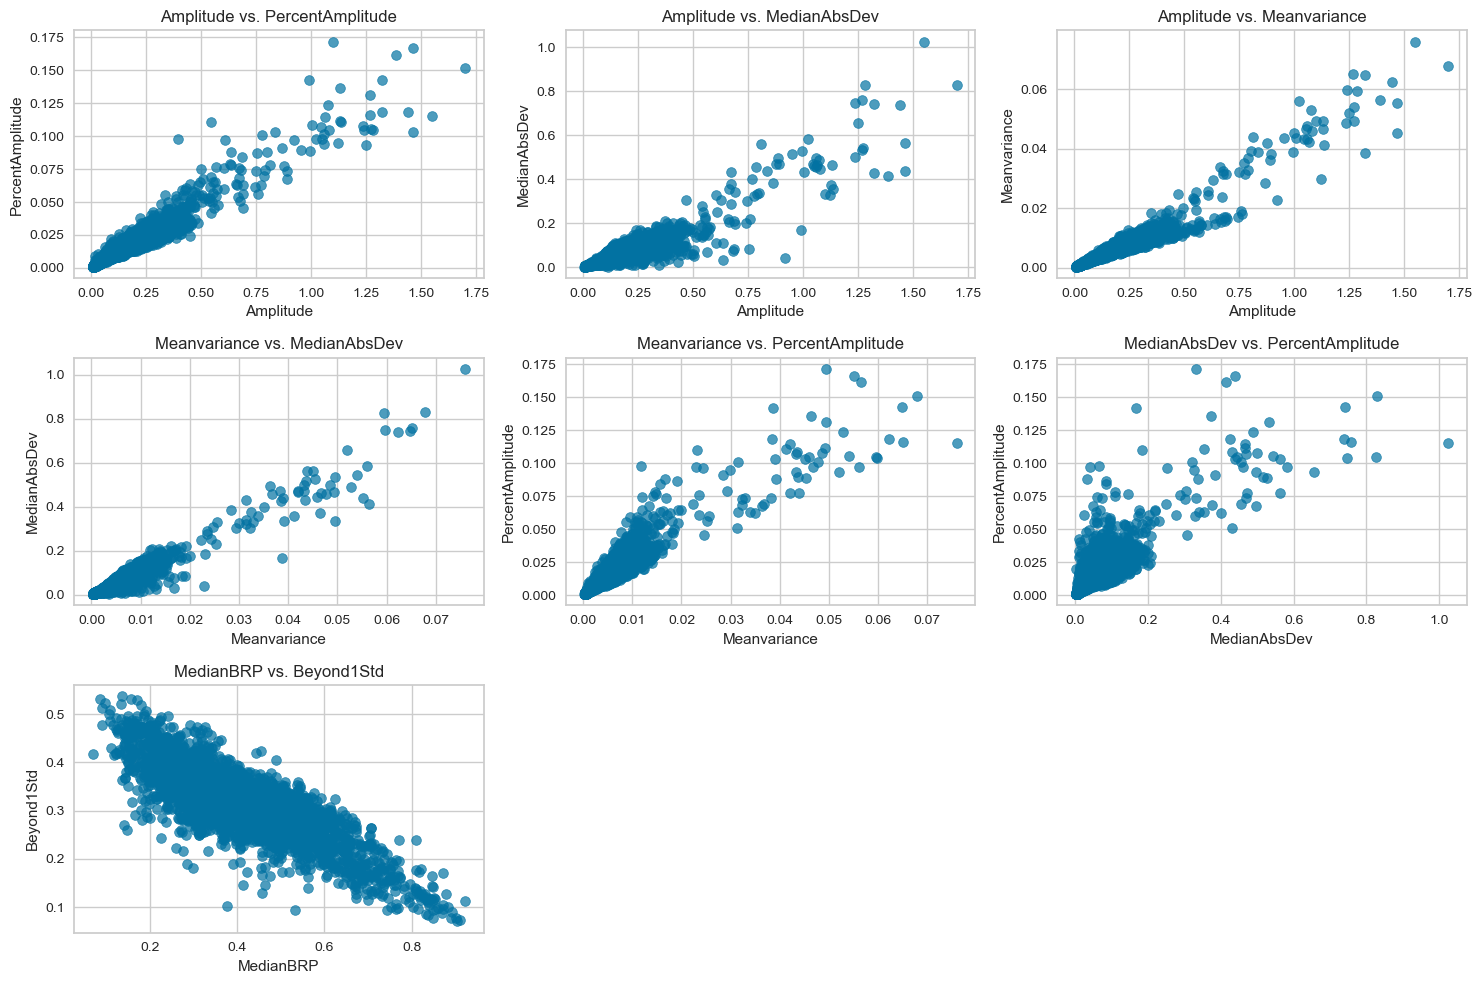

In [206]:
# relaciones
pairs = [
    ('Amplitude', 'PercentAmplitude'),
    ('Amplitude', 'MedianAbsDev'),
    ('Amplitude', 'Meanvariance'),
    ('Meanvariance', 'MedianAbsDev'),
    ('Meanvariance', 'PercentAmplitude'),
    ('MedianAbsDev', 'PercentAmplitude'),
    ('MedianBRP', 'Beyond1Std')
]

# Crear gráficos
plt.figure(figsize=(15, 10))
for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=dfkm2, x=x, y=y, alpha=0.7, edgecolor=None)
    plt.title(f"{x} vs. {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)

plt.tight_layout()
plt.show()

Con respecto a la relación entre las variables, "Amplitude" tiene una correlación positiva alta con las variables "PercentAmplitude", "MedianAbsDev" y "Meanvariance", así mismo, hay una fuerte correlación entre "Meanvariance" con "MedianAbsDev" y "PercentAmplitude", y de la variable "MedianAbsDev" con "PercentAmplitude". Por otro lado, "MedianBRP" tiene una correlación negativa con "Beyond1Std". Esta información hace pensar que quizás hay variables que sean redudantes para el modelo, de momento, cómo se desconoce bien el significado de cada variable, no podría eliminar alguna de las que están relacionadas y que quizás no esten aportando información nueva al modelo. Otra opción sería utilizar uno de los modelos de reducción de dimensiones.

In [6]:
# Crear una copia del dataframe para conservar los datos originales
dfkm2_normalizada = dfkm2.copy()

# Seleccionar solo las columnas numéricas para normalizarlas
numeric_cols = dfkm2.select_dtypes(include=['float64', 'int64']).columns

# Crear el escalador
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalizar las columnas numéricas
dfkm2_normalizada[numeric_cols] = scaler.fit_transform(dfkm2[numeric_cols])

# Mostrar los primeros registros de la base normalizada
dfkm2_normalizada.head(10)

,Unnamed: 0,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,0.0000,0.011810,0.000000,0.028986,0.427995,0.549661,0.327761,0.000370,0.276117,0.009723,0.006843,0.544094,0.023519,0.001389
1,0.0002,0.122232,0.000000,0.246377,0.592447,0.582665,0.327920,0.000012,0.215173,0.110845,0.093353,0.200045,0.152480,0.000077
2,0.0004,0.155595,0.000000,0.000000,0.327894,0.615361,0.327701,0.000934,0.816455,0.085561,0.067449,0.540185,0.155785,0.000196
3,0.0006,0.198110,0.000000,0.173913,0.699698,0.538556,0.326105,0.001963,0.270386,0.171995,0.146139,0.211774,0.168550,0.009102
4,0.0008,0.002214,0.099096,0.000000,0.522011,0.543183,0.327860,0.000296,0.206016,0.001995,0.001955,0.498759,0.003382,0.000594
5,0.0010,0.050487,0.000000,0.000000,0.463746,0.559994,0.327980,0.060000,0.636969,0.030978,0.025904,0.415075,0.044354,0.000241
6,0.0012,0.039120,0.000036,0.173913,0.428574,0.560148,0.324489,0.002773,0.165037,0.032563,0.019550,0.394048,0.045304,0.011498
7,0.0014,0.126956,0.040170,0.000000,0.487781,0.533467,0.326683,0.014387,0.449293,0.101783,0.086022,0.242968,0.092366,0.000043
8,0.0016,0.033068,0.053139,0.028986,0.515254,0.549198,0.326823,0.000244,0.092978,0.032074,0.019550,0.248782,0.029825,0.003711
9,0.0018,0.007676,0.012847,0.043478,0.456595,0.545034,0.327621,0.001202,0.131228,0.007213,0.004399,0.508907,0.014072,0.108311


#### Aplicar el algoritmo k-means a la base de datos, determinando el número de clusters adecuados

<Figure size 800x550 with 0 Axes>

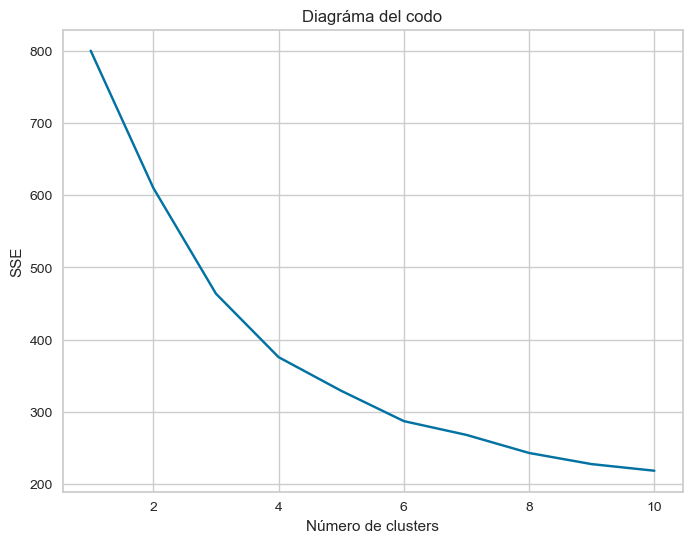

In [214]:
# Diccionario para almacenar la suma de errores cuadráticos para diferentes números de clusters
sse = {}
# Bucle sobre un rango de 1 a 10 clusters
for k in range(1, 11):
    # Inicializar KMeans con el número actual de clusters
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(dfkm2_normalizada)
    # Almacenar la inercia (SSE) para este valor de k
    sse[k] = kmeans.inertia_

# Graficar SSE para diferentes conteos de clusters para encontrar el número óptimo de clusters
plt.figure()
plt.figure(figsize=(8, 6))
plt.title('Diagráma del codo')
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de clusters")
plt.ylabel("SSE")
plt.show()

Para estos datos, se produce un quiebre en el número 6, por lo tanto, se utilizarán 6 clusters

In [217]:
# Inicializar el clustering KMeans
k_means = KMeans(n_clusters=6, random_state=1)

# Ajustar el modelo KMeans
k_means.fit(dfkm2_normalizada)

KMeans(n_clusters=6, random_state=1)

In [219]:
# Imprimir los centros de los clusters
print('Los centroides son :\n',np.round(k_means.cluster_centers_,2))

# Imprimir la inercia - suma de distancias cuadradas de las muestras a su centro de cluster más cercano
print('La inercia es : \n' ,np.round(k_means.inertia_,2))

# Imprimir las etiquetas para cada punto
k_means_labels = k_means.predict(dfkm2_normalizada)
k_means_labels

Los centroides son :
 [[0.58 0.02 0.19 0.67 0.5  0.32 0.   0.24 0.55 0.44 0.22 0.57 0.03]
 [0.02 0.08 0.04 0.49 0.55 0.33 0.   0.28 0.01 0.01 0.47 0.02 0.04]
 [0.06 0.04 0.13 0.61 0.55 0.33 0.   0.23 0.05 0.04 0.29 0.06 0.02]
 [0.02 0.53 0.03 0.53 0.54 0.33 0.   0.29 0.02 0.01 0.39 0.02 0.02]
 [0.13 0.01 0.01 0.29 0.61 0.33 0.03 0.71 0.08 0.05 0.66 0.15 0.  ]
 [0.14 0.03 0.   0.67 0.53 0.33 0.02 0.64 0.1  0.1  0.25 0.11 0.  ]]
La inercia es : 
 286.99


array([1, 2, 4, ..., 2, 3, 2])

#### Interpretar los resultados de los centroides.

In [222]:
# Crear una copia del dataframe original para agregar las etiquetas de cluster
dfkm2_Cluster = dfkm2.copy()
dfkm2_Cluster['Cluster'] = k_means.labels_

# Calcular el promedio de las variables originales por cluster
cluster_summary = dfkm2_Cluster.groupby('Cluster').mean()

# Mostrar el resumen por cluster
print("Resumen de las variables originales por cluster:")
print(cluster_summary)

Resumen de las variables originales por cluster:
         Amplitude  AndersonDarling  Autocor_length  Beyond1Std     Gskew  \
Cluster                                                                     
0         0.986632         0.016637       14.035088    0.381834 -0.152447   
1         0.038548         0.078931        3.709428    0.298621  0.004480   
2         0.104364         0.035737        9.784685    0.354965  0.009755   
3         0.040488         0.521010        2.736655    0.318731  0.001870   
4         0.234739         0.007715        1.707094    0.206082  0.218697   
5         0.246579         0.026223        1.328431    0.381555 -0.042900   

         LinearTrend  MaxSlope       Mean  Meanvariance  MedianAbsDev  \
Cluster                                                                 
0          -0.000471  0.719976  13.934319      0.042201      0.455895   
1          -0.000007  0.742957  14.324946      0.001374      0.011661   
2          -0.000006  0.631989  13.855072 

El Cluster 4 tiene un promedio de "PeriodLS" de 18.53, mucho menor que el resto de los clusters, lo que indica que las observaciones en este grupo tienen ciclos más cortos en comparación con los demás. En contraste, el Cluster 0 tiene un promedio de PeriodLS de 447.83, mientras que el Cluster 1 tiene un promedio similar de 459.36, representando ciclos más largos.
En cuanto a "Autocor_length", el Cluster 0 tiene un promedio de 14.03, destacándose como el más alto. Por el contrario, el Cluster 5 tiene un promedio de solo 1.32. Este contraste podría indicar grandes diferencias entre en estos clusters.
Respecto a "Gskew", el Cluster 4 muestra un promedio de 0.2187, lo que indica una asimetría positiva en la distribución de los datos de este grupo. Esto contrasta con el Cluster 0, que tiene un promedio de -0.1524, reflejando una asimetría negativa. Las diferencias en Gskew entre clusters sugieren patrones distintos en cómo los datos tienden a desviarse de su media, con el Cluster 4 inclinándose hacia valores más altos y el Cluster 0 hacia valores más bajos.

#### Aplicar el clustering jerárquico. Luego visualizar el dendograma y determinar el número de clusters adecuado.

In [226]:
# Función para graficar el dendrograma
def plot_dendrogram(model, **kwargs):
    '''Grafica el dendrograma a partir de un modelo AgglomerativeClustering'''

    # Crea el conteo de muestras debajo de cada nodo
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # nodo hoja
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    # Construye la matriz de enlace
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Grafica el dendrograma
    dendrogram(linkage_matrix, **kwargs)

In [228]:
# Modelo de clustering jerárquico
ac = AgglomerativeClustering(
    n_clusters=None,  # No fijar número de clusters
    metric='euclidean',  # Métrica de distancia
    linkage='complete',  # Método de enlace
    distance_threshold=0.00  # Umbral para formar clusters
)

In [230]:
# Ajustamos a los datos
ac.fit(dfkm2_normalizada)

AgglomerativeClustering(distance_threshold=0.0, linkage='complete',
                        n_clusters=None)

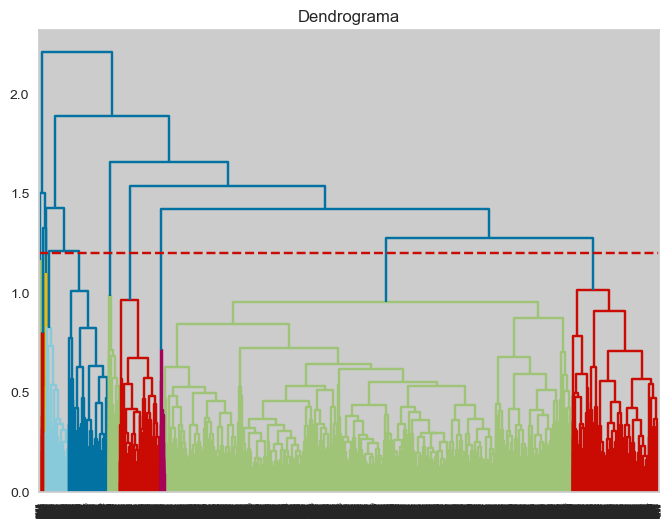

In [232]:
Corte_Cluster = 1.2  # umbral

# Graficar el dendrograma
plt.figure(figsize=(8, 6))
plt.title("Dendrograma")
plot_dendrogram(ac,color_threshold=Corte_Cluster)
plt.axhline(y=Corte_Cluster, color='r', linestyle='--',  label=f'Umbral = {Corte_Cluster}')  # Línea de corte
plt.show()

El dendograma arroja una cantidad enorme de cluster, con linea roja se marca una altura donde las ramas están claramente separadas, por lo tanto, puede ser una posibilidad, serían aproximadamente 8 Clusters.

#### Implementar modelo de mezcla de Gaussianas.

In [234]:
# Rango de gausianas a probar
n_componentes = np.arange(1,10)

modelos = [GaussianMixture(n, covariance_type = 'full', random_state = 0).fit(dfkm2_normalizada)
           for n in n_componentes]

modelos

[GaussianMixture(random_state=0),
 GaussianMixture(n_components=2, random_state=0),
 GaussianMixture(n_components=3, random_state=0),
 GaussianMixture(n_components=4, random_state=0),
 GaussianMixture(n_components=5, random_state=0),
 GaussianMixture(n_components=6, random_state=0),
 GaussianMixture(n_components=7, random_state=0),
 GaussianMixture(n_components=8, random_state=0),
 GaussianMixture(n_components=9, random_state=0)]

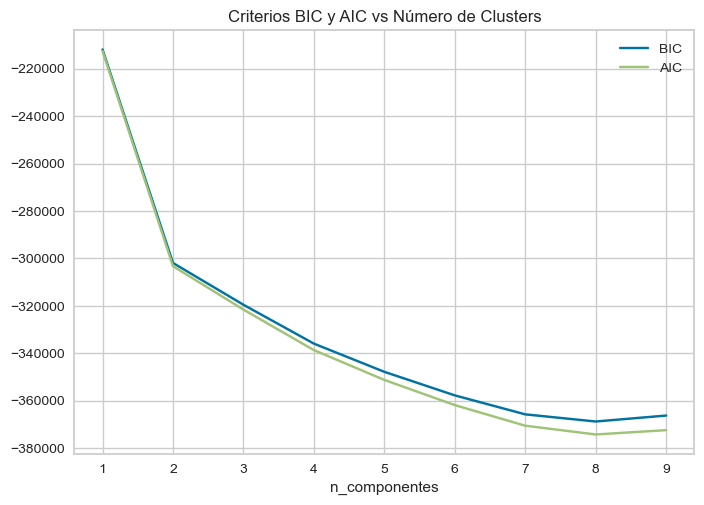

In [235]:
plt.plot(n_componentes, [m.bic(dfkm2_normalizada) for m in modelos], label = 'BIC')
plt.plot(n_componentes, [m.aic(dfkm2_normalizada) for m in modelos], label = 'AIC')
plt.legend(loc='best')
plt.xlabel('n_componentes')
plt.title("Criterios BIC y AIC vs Número de Clusters")
plt.show()

In [238]:
res_bic = [ m.bic(dfkm2_normalizada) for m in modelos]
res_bic

[-211896.63875123285,
 -301912.57656232035,
 -319530.40309505945,
 -335922.24715400004,
 -347815.44738410495,
 -357746.4460257968,
 -365747.9774331595,
 -368759.63525764894,
 -366247.3101384533]

In [240]:
res_aic = [ m.aic(dfkm2_normalizada) for m in modelos]
res_aic

[-212574.42684314013,
 -303274.66993932636,
 -321576.8017571641,
 -338652.95110120345,
 -351230.456616407,
 -361845.7605431976,
 -370531.597235659,
 -374227.56034524716,
 -372399.54051115026]

Según el gráfico de evaluación de los criterios BIC y AIC, los valores mínimos se encuentran en el Cluster = 8, por lo tanto este sería el número de cluster óptimo.

In [243]:
gmm = GaussianMixture(n_components = 8, random_state=1).fit(dfkm2_normalizada)  # n_clusters = n_componentes
gmm

GaussianMixture(n_components=8, random_state=1)

In [245]:
### Encontramos los labels
gmm_labels = gmm.predict(dfkm2_normalizada)
gmm_labels

array([7, 4, 3, ..., 1, 1, 1], dtype=int64)

In [247]:
X = dfkm2_normalizada

for i in range(gmm.n_components):
    
    print('---------------------')
    print('Gaussiana '+str(i))
    print('Medias')
    print(gmm.means_[i])
    print('Covarianza')
    print(gmm.covariances_[i])

---------------------
Gaussiana 0
Medias
[0.29208812 0.02161168 0.25023872 0.58490682 0.52986626 0.32482239
 0.00559324 0.25506677 0.27170992 0.20887798 0.31292457 0.29347307
 0.04062523]
Covarianza
[[ 6.89530238e-02  3.00359113e-05 -1.66880511e-02  1.05462945e-02
  -5.88321585e-03 -9.22698048e-04 -6.63032226e-04  9.75272166e-04
   6.47320963e-02  5.24381615e-02 -1.38767398e-02  6.46560225e-02
   7.07967430e-06]
 [ 3.00359113e-05  4.41588191e-03 -3.11716540e-03 -1.01854025e-04
   1.61911365e-04  2.91505286e-04  1.27484205e-05  2.22559914e-03
  -2.77845632e-04 -1.03553756e-04 -1.17082695e-04 -9.19040398e-04
  -3.82845840e-04]
 [-1.66880511e-02 -3.11716540e-03  4.76922515e-02  5.64728319e-03
   3.00559715e-03  1.19186823e-03  2.60967234e-04  1.98850304e-03
  -1.56016419e-02 -1.06879846e-02 -4.52625889e-03 -1.90828844e-02
   2.46380993e-03]
 [ 1.05462945e-02 -1.01854025e-04  5.64728319e-03  3.42459016e-02
   1.75333079e-03 -3.67623138e-04 -1.72317732e-04 -1.45716360e-03
   1.39210565e-02 

In [269]:
pca = PCA(n_components=2) # n dimensiones que queremos reducir nuestros datos
pca.fit(dfkm2_normalizada)
x_pca_gmm=pca.transform(dfkm2_normalizada)
x_pca_gmm

array([[ 0.03671652,  0.03980165],
       [ 0.01615866, -0.32062493],
       [ 0.48092099,  0.28416365],
       ...,
       [-0.02158176, -0.14920482],
       [-0.33174228,  0.13519163],
       [-0.07145643, -0.1929549 ]])

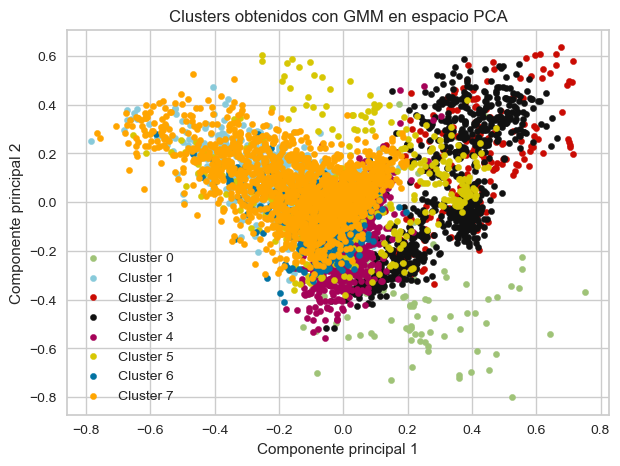

In [275]:
# Lista de colores
colores = ['g', 'c', 'r', 'k', 'm', 'y', 'b', 'orange', 'pink']

# Graficar clusters
fig = plt.figure(figsize=(7, 5))
for i in range(gmm.n_components):
    plt.scatter(
        x_pca_gmm[gmm_labels == i, 0],  # Primera componente principal
        x_pca_gmm[gmm_labels == i, 1],  # Segunda componente principal
        color=colores[i],  # Color del marcador
        label=f'Cluster {i}',
        s=20  # Tamaño del marcador
    )

# Etiquetas y leyenda
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend()
plt.title('Clusters obtenidos con GMM en espacio PCA')
plt.show()

#### Comparar los resultados de K-means y GMM.

GMM es un modelo probabilístico que asume que los datos provienen de una combinación de distribuciones gaussianas. Esto le permite asignar a cada punto una probabilidad de pertenecer a un cluster, en lugar de una asignación rígida como en K-Means. Gracias a esto, GMM puede generar clusters de formas más complejas y adaptarse mejor a datos con diferentes tamaños y densidades, a diferencia del K-Means que solo crea clusters de formas esféricas.

In [261]:
# Calculamos el Davies Bouldin Score para K-Means
davies_bouldin_kmeans = np.round(davies_bouldin_score(dfkm2_normalizada, k_means_labels),3)
print(f'Davies-Bouldin Score para K-Means: {davies_bouldin_kmeans}')

# Calculamos el Davies Bouldin Score para GMM
davies_bouldin_gmm = np.round(davies_bouldin_score(dfkm2_normalizada, gmm_labels),3)
print(f'Davies-Bouldin Score para GMM: {davies_bouldin_gmm}')

Davies-Bouldin Score para K-Means: 1.101
Davies-Bouldin Score para GMM: 4.084


C:\Users\jpaillaguala\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


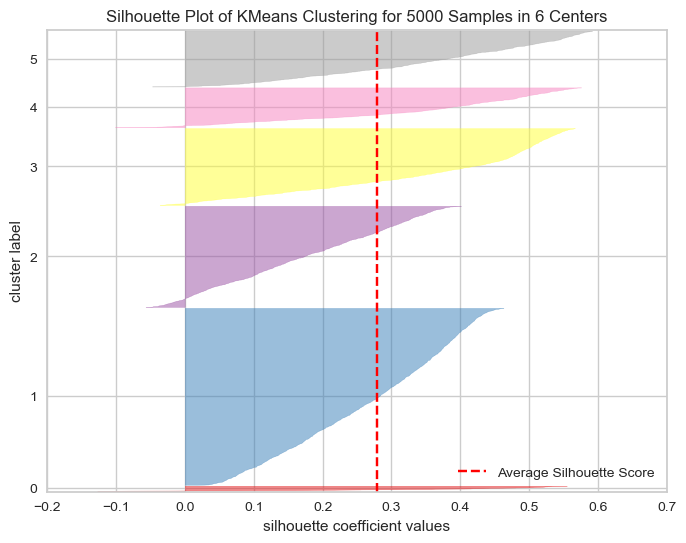

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5000 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [263]:
# Visualización de Silhouette para K-Means
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
visualizer_kmeans = SilhouetteVisualizer(k_means, ax=ax)
visualizer_kmeans.fit(dfkm2_normalizada)
visualizer_kmeans.show()

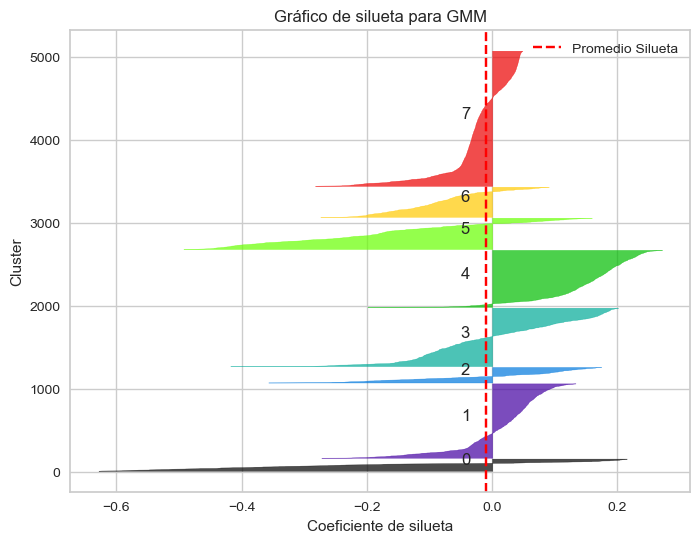

In [264]:
# Visualización de Silhouette para GMM
# Calcular el coeficiente de silueta para GMM
silhouette_avg_gmm = silhouette_score(dfkm2_normalizada, gmm_labels)

# Crear el gráfico de silueta para GMM
fig, ax = plt.subplots(figsize=(8, 6))

# Coeficientes de silueta por muestra
sample_silhouette_values = silhouette_samples(dfkm2_normalizada, gmm_labels)

y_lower = 10  # Espaciado inicial
for i in range(8):  # Para cada cluster
    ith_cluster_silhouette_values = sample_silhouette_values[gmm_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 8)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Espaciado entre clusters

ax.set_title("Gráfico de silueta para GMM")
ax.set_xlabel("Coeficiente de silueta")
ax.set_ylabel("Cluster")

ax.axvline(x=silhouette_avg_gmm, color="red", linestyle="--", label="Promedio Silueta")
ax.legend()
plt.show()

El modelo de K-Means tiene un coeficiente de Davies-Bouldin más bajo que el GMM, lo que indica que este método produjo clusters más compactos y con mayor separación entre ellos. Esto también se refleja en los gráficos de siluetas, donde el Modelo K-Means tiene valores cercanos o por encima de 0.5, por otro lado, los coeficientes de para el modelo de GMM son por debajo de 0.3 incluso teniendo valores negativos. Esto sugiere que el modelo K-Means es más adecuado para los datos analizados, proporcionando clusters más definidos y representativos.